In [3]:
# Standard libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt

# For audio files
import librosa
from IPython.display import Audio

In [4]:
import librosa.display
import os   
import librosa

In [5]:
file_audio_path = r'C:\Users\manhm\Desktop\Queen_classification\dataset\test\bee\CF003 - Active - Day - (214)-8-0.wav'

In [7]:
audio = librosa.load(file_audio_path, sr=16000)

In [10]:
def visualize_audio(audio, xlim, sr=16000):
  fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10), sharex=True)

  # plot1: soundwave
  librosa.display.waveshow(audio, sr=sr, ax=axes[0][0])
  axes[0][0].set_title('Soundwave')
  axes[0][0].set_ylabel('Amplitude')
  axes[0][0].set_xlabel('')

  # plot2: log scale melspectogram
  power_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
  S_dB = librosa.power_to_db(power_spectrogram, ref=np.max)
  librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=axes[1][0])
  axes[1][0].set_title('Log Scale Melspectrogram')
  axes[1][0].set_xlabel('')

  # plot3: mfcc
  mfcc = librosa.feature.mfcc(y=audio, sr=sr)
  librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=axes[2][0])
  axes[2][0].set_title('MFCC')
  axes[2][0].set_xlabel('')

  # plot4: chroma
  chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
  librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', ax=axes[0][1])
  axes[0][1].set_title('Chroma')
  axes[0][1].set_xlabel('')

  # plot5: RMS energy
  rms = librosa.feature.rms(y=audio)
  times = librosa.times_like(rms, sr=sr)
  axes[1][1].plot(times, rms[0])
  axes[1][1].set_title('RMS Energy')
  axes[1][1].set_ylabel('RMS')

  # plot6: Spectral Centroid
  sc = librosa.feature.spectral_centroid(y=audio, sr=sr)
  axes[2][1].plot(times, sc.T)
  axes[2][1].set_title('Spectral Centroid')
  axes[2][1].set_ylabel('Hz')

  plt.tight_layout()

  axes[2][1].set_xlabel('Time')
  axes[2][0].set_xlabel('Time')

  plt.xlim(0,xlim)

  plt.show()

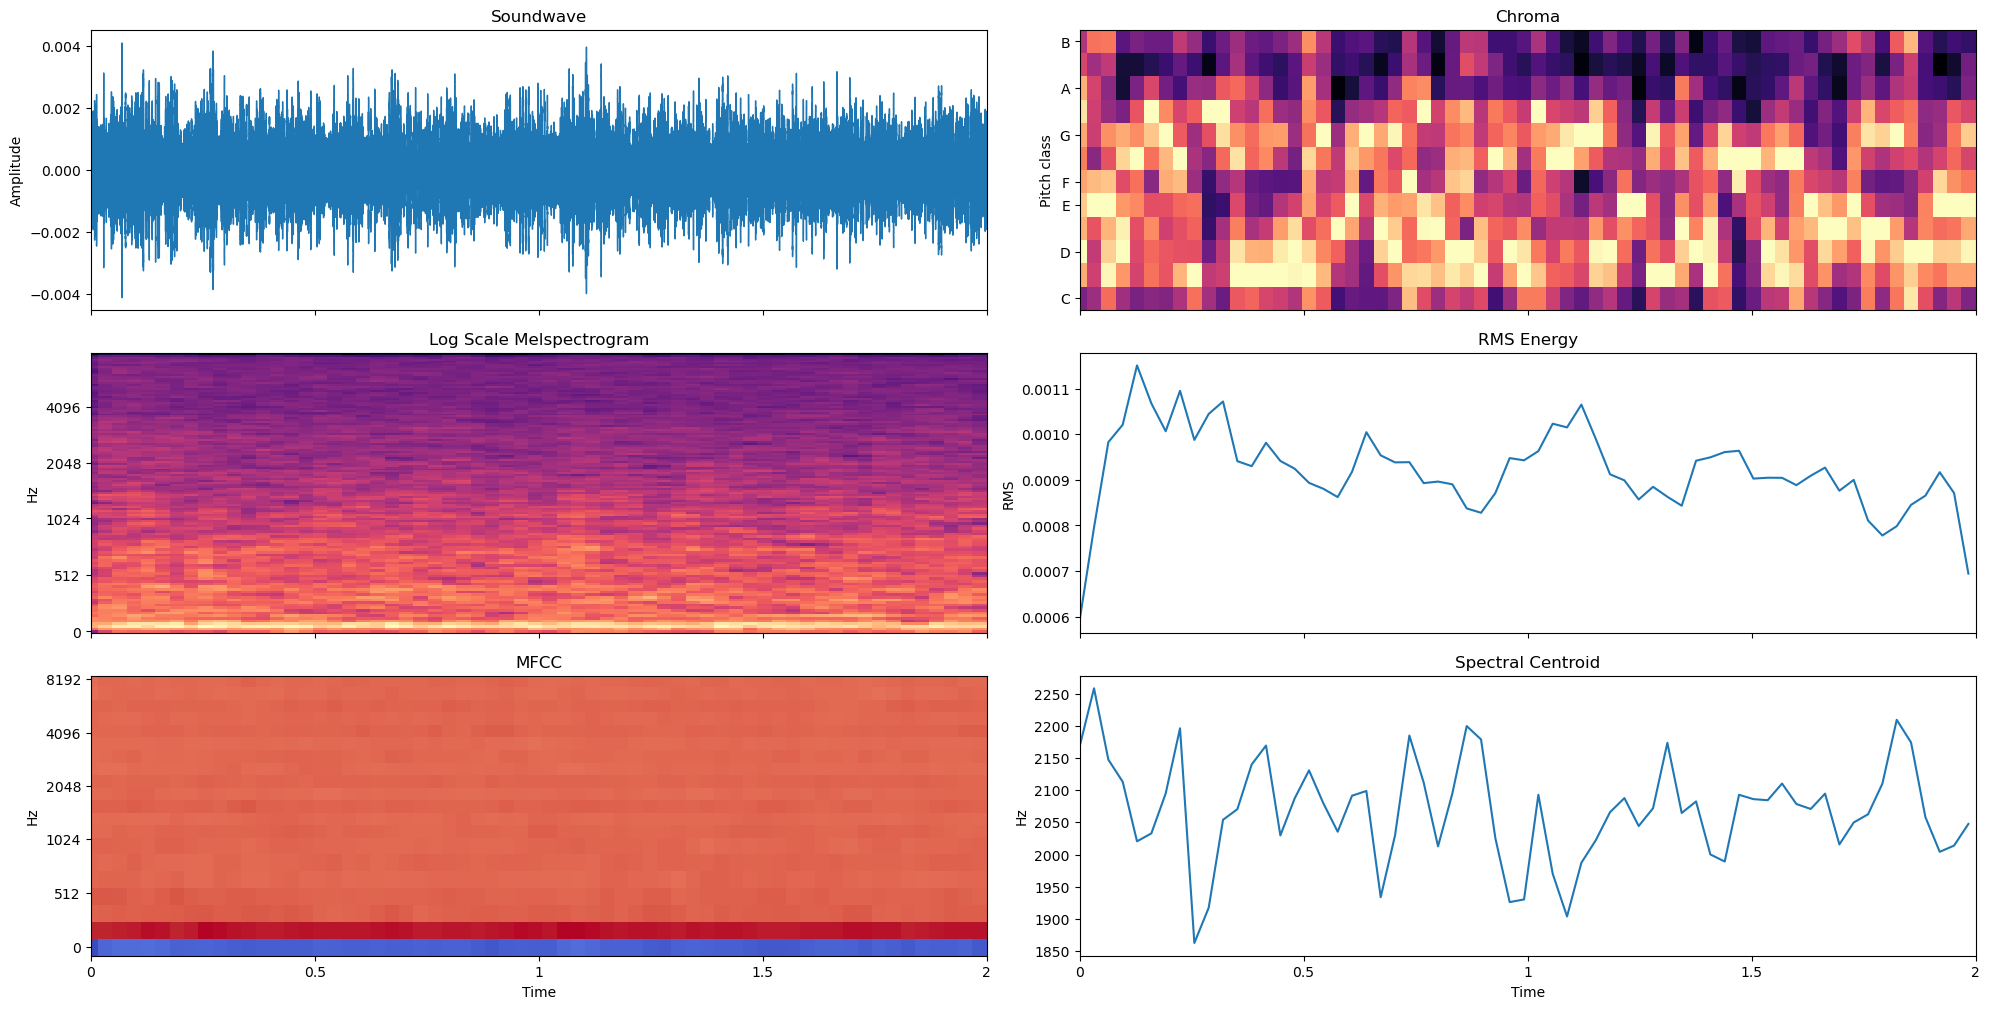

In [12]:
visualize_audio(audio[0], xlim=2)